In [1]:
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
data = pd.read_csv('train.csv', sep=',', index_col=0)

In [2]:
data['age'] = round(data['age'] / 365)
target = data['cardio']
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
66728,60.0,1,156,64.0,140,80,2,1,0,0,1,1
69098,60.0,1,170,85.0,160,90,1,1,0,0,1,1
59185,64.0,1,151,90.0,130,80,1,1,0,0,1,1
49288,54.0,1,159,97.0,120,80,1,1,0,0,1,1
62481,50.0,1,164,68.0,120,80,1,1,0,0,1,0


In [3]:
x_train, x_val, y_train, y_val = train_test_split(data.drop('cardio', axis=1), data['cardio'], test_size=0.2, random_state=0)

In [30]:
#import min max scaler, one hot encoder, and column transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

var_to_be_used = ['gluc', 'cholesterol', 'ap_hi', 'age', 'ap_lo', 'weight']
numerical_features = ['ap_hi', 'ap_lo', 'age', 'weight']
categorical_features = ['gluc', 'cholesterol']

# create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

preprocessor_naive = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
    ]
)

x_train_all = preprocessor.fit_transform(data.drop('cardio', axis=1))
x_naive = preprocessor_naive.fit_transform(data.drop('cardio', axis=1))

In [5]:
random_forest_params = {'n_estimators': 158,
 'max_depth': 7,
 'min_samples_split': 10,
 'min_samples_leaf': 7,
 'max_features': 'auto',
 'bootstrap': False,
 'criterion': 'gini',
 'max_leaf_nodes': 14,
 'min_weight_fraction_leaf': 0.007871254791640473}

knn_params = {'n_neighbors': 18,
 'weights': 'uniform',
 'algorithm': 'ball_tree',
 'leaf_size': 100,
 'p': 9}

logistic_regression_params = {'C': 57.937754555854134,
 'penalty': 'l1',
 'solver': 'liblinear',
 'max_iter': 443}

xgboost_params = {'max_depth': 56,
 'learning_rate': 0.8362189302931353,
 'n_estimators': 469,
 'min_child_weight': 37,
 'gamma': 1.2174695610100952e-05,
 'subsample': 0.3973219220957762,
 'colsample_bytree': 0.055240716417472226,
 'reg_alpha': 0.0003095006245940739,
 'reg_lambda': 0.004388821550143689}

naive_bayes_params = {'var_smoothing': 0.6906875591579865}

decision_tree_params = {'criterion': 'gini',
 'max_depth': 12,
 'min_samples_split': 91,
 'min_samples_leaf': 84,
 'splitter': 'best',
 'max_features': 'log2',
 'max_leaf_nodes': 43}

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# create the models
random_forest = RandomForestClassifier(**random_forest_params)
knn = KNeighborsClassifier(**knn_params)
logistic_regression = LogisticRegression(**logistic_regression_params)
xgboost = XGBClassifier(**xgboost_params)
naive_bayes = GaussianNB(**naive_bayes_params)
decision_tree = DecisionTreeClassifier(**decision_tree_params)

# fit the models
random_forest.fit(x_train_all, data['cardio'])
knn.fit(x_train_all, data['cardio'])
logistic_regression.fit(x_train_all, data['cardio'])
xgboost.fit(x_train_all, data['cardio'])
naive_bayes.fit(x_naive, data['cardio'])
decision_tree.fit(x_train_all, data['cardio'])


# predict the models
random_forest_pred = random_forest.predict(x_train_all)
knn_pred = knn.predict(x_train_all)
logistic_regression_pred = logistic_regression.predict(x_train_all)
xgboost_pred = xgboost.predict(x_train_all)
naive_bayes_pred = naive_bayes.predict(x_naive)
decision_tree_pred = decision_tree.predict(x_train_all)

/home/bmmuc/.pyenv/versions/3.8.0/envs/estat/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [7]:
results = pd.DataFrame({'Random Forest': random_forest_pred, 'KNN': knn_pred, 'Logistic Regression': logistic_regression_pred, 'XGBoost': xgboost_pred, 'Naive Bayes': naive_bayes_pred, 'Decision Tree': decision_tree_pred, 'Target': data['cardio']})

In [8]:
results.head()

,Random Forest,KNN,Logistic Regression,XGBoost,Naive Bayes,Decision Tree,Target
id,,,,,,,
66728,1,0,1,1,0,1,1
69098,1,1,1,1,0,1,1
59185,1,1,1,1,1,1,1
49288,0,1,0,0,0,0,1
62481,0,0,0,0,0,0,0


In [34]:
val_preds = ['decision_tree.csv', 'knn.csv', 'logistic_regression.csv', 'naive_bayes.csv', 'random_forest.csv', 'xgboost.csv']

preds = []
for pred in val_preds:
    preds.append(pd.read_csv(pred, sep=',', names=[f'{pred.split(".")[0]}_val']))

preds = pd.concat(preds, axis=1)

,decision_tree_val,knn_val,logistic_regression_val,naive_bayes_val,random_forest_val,xgboost_val
0,1,1,1,0,1,1
1,0,0,0,0,0,0
2,0,1,1,0,0,1
3,1,1,1,0,1,1
4,1,1,1,1,1,1


In [10]:
# create a logistic regression model to predict the target
from sklearn.linear_model import LogisticRegression
import optuna
from sklearn.metrics import accuracy_score, precision_score

# ensemble_model = LogisticRegression()
def objective(trial):
    """Define the objective function"""

    params = {
        'C': trial.suggest_loguniform('C', 1e-3, 1e3),
        'penalty': trial.suggest_categorical('penalty', ['l1', 'l2']),
        'solver': trial.suggest_categorical('solver', ['liblinear', 'saga']),
        'max_iter': trial.suggest_int('max_iter', 100, 1000)
    }


    optuna_model = LogisticRegression(**params)
    optuna_model.fit(x_train, y_train)


    y_pred = optuna_model.predict(x_val)

    precision = precision_score(y_val, y_pred)
    return precision
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, n_jobs=8, timeout=600 * 3)

/home/bmmuc/.pyenv/versions/3.8.0/envs/estat/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2023-04-23 14:18:05,297] A new study created in memory with name: no-name-e5007602-a847-4b84-8f6e-7545e83e769c
/tmp/ipykernel_5848/1917297861.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'C': trial.suggest_loguniform('C', 1e-3, 1e3),
/tmp/ipykernel_5848/1917297861.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'C': trial.suggest_loguniform('C', 1e-3, 1e3)

In [13]:
trial = study.best_trial
params = trial.params
lr_clf = LogisticRegression(**params)

In [14]:
params

{'C': 0.0017407003774312518,
 'penalty': 'l1',
 'solver': 'saga',
 'max_iter': 266}

In [36]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True, random_state=0)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_clf, x_train, y_train, cv=kf, scoring='precision', n_jobs=8)
scores_accuracy = cross_val_score(lr_clf, x_train, y_train, cv=kf, scoring='accuracy', n_jobs=8)

print('precision: {:.2f} +/- {:.2f}'.format(scores.mean(), scores.std()))
print('accuracy: {:.2f} +/- {:.2f}'.format(scores_accuracy.mean(), scores_accuracy.std()))

precision: 0.76 +/- 0.01
accuracy: 0.74 +/- 0.01


In [37]:
lr_clf.fit(results.drop('Target', axis=1), results['Target'])

LogisticRegression(C=0.0017407003774312518, max_iter=266, penalty='l1',
                   solver='saga')

In [ ]:
# predict the test data

In [17]:
data_test = pd.read_csv('test.csv')
test_target = data_test['cardio']
data_test['age'] = round(data_test['age'] / 365)
data_test.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
1,15,62.0,1,169,80.0,120,80,1,1,0,0,1,0
2,18,41.0,2,165,60.0,120,80,1,1,0,0,0,0
3,24,46.0,2,172,112.0,120,80,1,1,0,0,0,1
4,31,59.0,1,157,69.0,130,80,1,1,0,0,1,0


In [18]:
data_test['cardio'].shape

(14000,)

In [19]:
data_test.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
1,15,62.0,1,169,80.0,120,80,1,1,0,0,1,0
2,18,41.0,2,165,60.0,120,80,1,1,0,0,0,0
3,24,46.0,2,172,112.0,120,80,1,1,0,0,0,1
4,31,59.0,1,157,69.0,130,80,1,1,0,0,1,0


In [20]:
x_test = preprocessor.transform(data_test)
x_naive = preprocessor_naive.transform(data_test)

In [21]:
x_test.shape

(14000, 10)

In [22]:
random_forest_pred = random_forest.predict(x_test)
knn_pred = knn.predict(x_test)
logistic_regression_pred = logistic_regression.predict(x_test)
xgboost_pred = xgboost.predict(x_test)
naive_bayes_pred = naive_bayes.predict(x_naive)
decision_tree_pred = decision_tree.predict(x_test)

In [26]:
test_results = pd.DataFrame({'Random Forest': random_forest_pred, 'KNN': knn_pred, 'Logistic Regression': logistic_regression_pred, 'XGBoost': xgboost_pred, 'Naive Bayes': naive_bayes_pred, 'Decision Tree': decision_tree_pred, 'Target': data_test['cardio']})

Text(0.5, 1.0, 'Ensemble Model')

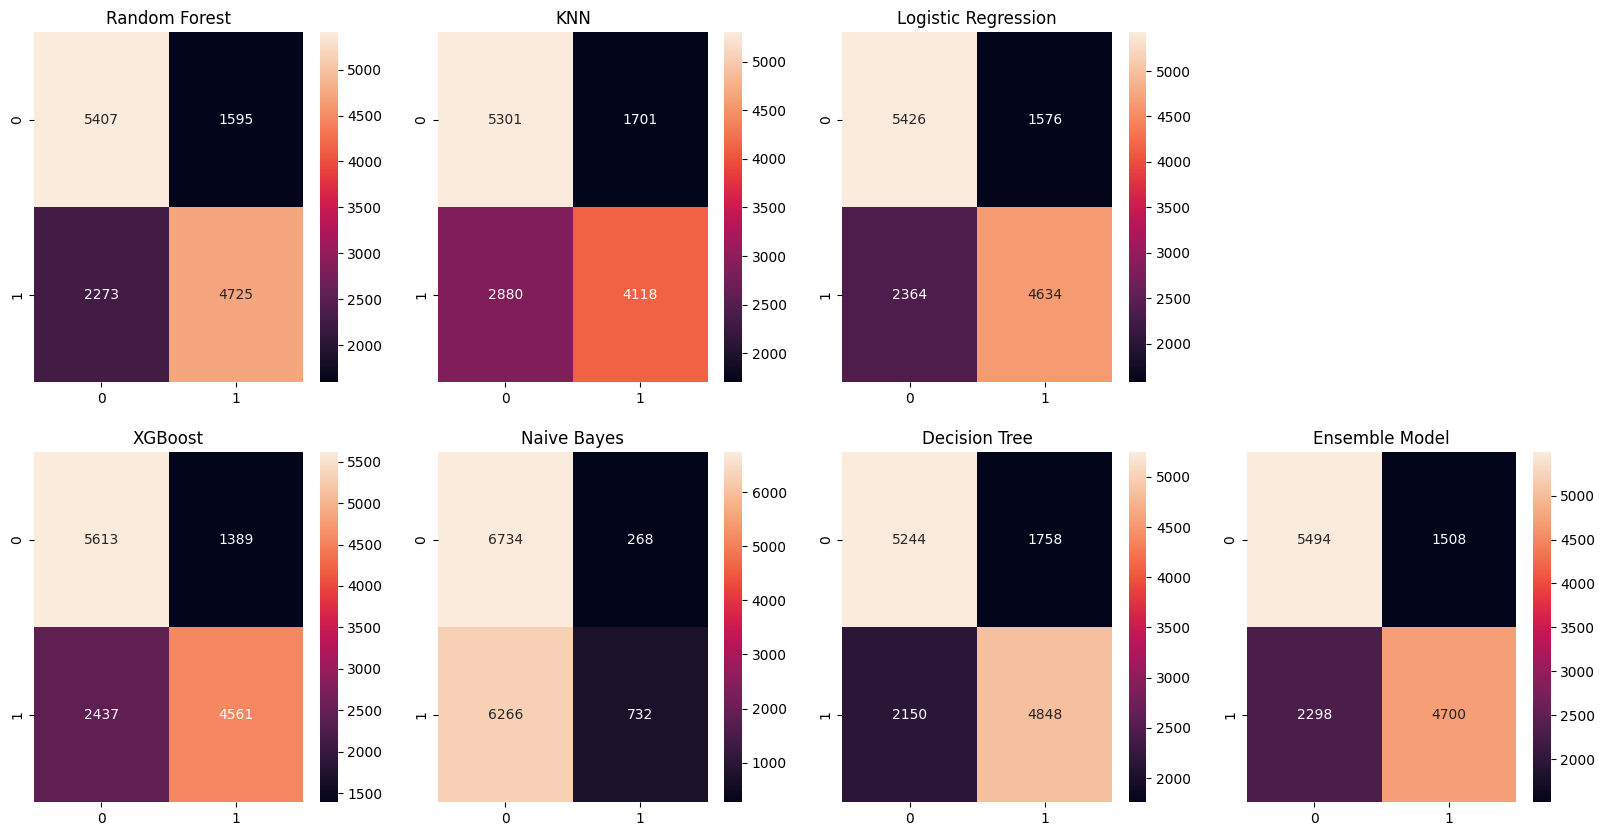

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

random_forest_cm = confusion_matrix(test_target, random_forest_pred)
knn_cm = confusion_matrix(test_target, knn_pred)
logistic_regression_cm = confusion_matrix(test_target, logistic_regression_pred)
xgboost_cm = confusion_matrix(test_target, xgboost_pred)
naive_bayes_cm = confusion_matrix(test_target, naive_bayes_pred)
decision_tree_cm = confusion_matrix(test_target, decision_tree_pred)
lr_clf_cm = confusion_matrix(test_target, lr_clf.predict(test_results.drop('Target', axis=1)))

fig, ax = plt.subplots(2, 4, figsize=(20, 10))
sns.heatmap(random_forest_cm, annot=True, ax=ax[0][0], fmt='g')
sns.heatmap(knn_cm, annot=True, ax=ax[0][1], fmt='g')
sns.heatmap(logistic_regression_cm, annot=True, ax=ax[0][2], fmt='g')
sns.heatmap(xgboost_cm, annot=True, ax=ax[1][0], fmt='g')
sns.heatmap(naive_bayes_cm, annot=True, ax=ax[1][1], fmt='g')
sns.heatmap(decision_tree_cm, annot=True, ax=ax[1][2], fmt='g')
sns.heatmap(lr_clf_cm, annot=True, ax=ax[1][3], fmt='g')
ax[0][3].set_visible(False)
ax[0][0].set_title('Random Forest')
ax[0][1].set_title('KNN')
ax[0][2].set_title('Logistic Regression')

ax[1][0].set_title('XGBoost')
ax[1][1].set_title('Naive Bayes')
ax[1][2].set_title('Decision Tree')

ax[1][3].set_title('Ensemble Model')

In [38]:
# compute accuracy and precision in the test set for each model
from sklearn.metrics import accuracy_score, precision_score

random_forest_accuracy = accuracy_score(test_target, random_forest_pred)
random_forest_precision = precision_score(test_target, random_forest_pred)

knn_accuracy = accuracy_score(test_target, knn_pred)
knn_precision = precision_score(test_target, knn_pred)

logistic_regression_accuracy = accuracy_score(test_target, logistic_regression_pred)
logistic_regression_precision = precision_score(test_target, logistic_regression_pred)

xgboost_accuracy = accuracy_score(test_target, xgboost_pred)
xgboost_precision = precision_score(test_target, xgboost_pred)

naive_bayes_accuracy = accuracy_score(test_target, naive_bayes_pred)
naive_bayes_precision = precision_score(test_target, naive_bayes_pred)

decision_tree_accuracy = accuracy_score(test_target, decision_tree_pred)
decision_tree_precision = precision_score(test_target, decision_tree_pred)

lr_clf_accuracy = accuracy_score(test_target, lr_clf.predict(test_results.drop('Target', axis=1)))
lr_clf_precision = precision_score(test_target, lr_clf.predict(test_results.drop('Target', axis=1)))

In [39]:
print('Random Forest: accuracy: {:.2f}, precision: {:.2f}'.format(random_forest_accuracy, random_forest_precision))
print('KNN: accuracy: {:.2f}, precision: {:.2f}'.format(knn_accuracy, knn_precision))
print('Logistic Regression: accuracy: {:.2f}, precision: {:.2f}'.format(logistic_regression_accuracy, logistic_regression_precision))
print('XGBoost: accuracy: {:.2f}, precision: {:.2f}'.format(xgboost_accuracy, xgboost_precision))
print('Naive Bayes: accuracy: {:.2f}, precision: {:.2f}'.format(naive_bayes_accuracy, naive_bayes_precision))
print('Decision Tree: accuracy: {:.2f}, precision: {:.2f}'.format(decision_tree_accuracy, decision_tree_precision))
print('Ensemble Model: accuracy: {:.2f}, precision: {:.2f}'.format(lr_clf_accuracy, lr_clf_precision))

Random Forest: accuracy: 0.72, precision: 0.75
KNN: accuracy: 0.67, precision: 0.71
Logistic Regression: accuracy: 0.72, precision: 0.75
XGBoost: accuracy: 0.73, precision: 0.77
Naive Bayes: accuracy: 0.53, precision: 0.73
Decision Tree: accuracy: 0.72, precision: 0.73
Ensemble Model: accuracy: 0.73, precision: 0.76
